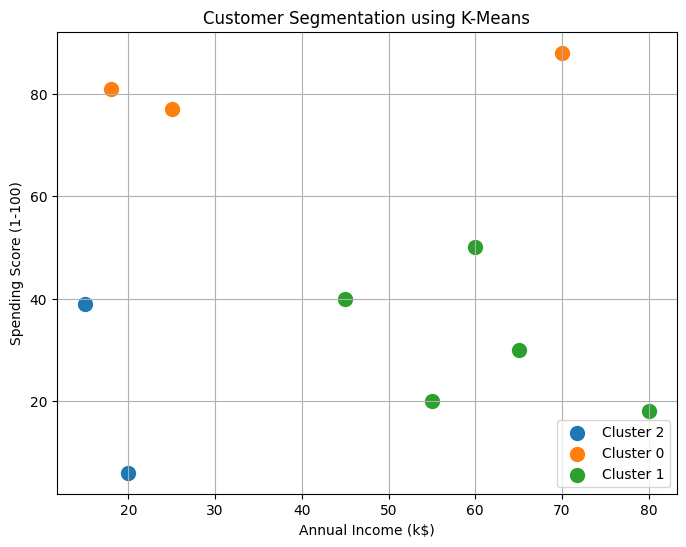


Clustered Customer Data:
   CustomerID  Age  Annual_Income_k$  Spending_Score  Cluster
0           1   19                15              39        2
1           2   21                18              81        0
2           3   20                20               6        2
3           4   23                25              77        0
4           5   31                45              40        1
5           6   45                55              20        1
6           7   50                60              50        1
7           8   40                65              30        1
8           9   33                70              88        0
9          10   60                80              18        1


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# === STEP 1: Create the dataset ===
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [19, 21, 20, 23, 31, 45, 50, 40, 33, 60],
    'Annual_Income_k$': [15, 18, 20, 25, 45, 55, 60, 65, 70, 80],
    'Spending_Score': [39, 81, 6, 77, 40, 20, 50, 30, 88, 18]
}
df = pd.DataFrame(data)

# === STEP 2: Preprocessing (Drop CustomerID and scale features) ===
X = df[['Age', 'Annual_Income_k$', 'Spending_Score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === STEP 3: Apply KMeans Clustering ===
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# === STEP 4: Visualize the clusters (2D using Annual Income & Spending Score) ===
plt.figure(figsize=(8, 6))
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual_Income_k$'], cluster_data['Spending_Score'], label=f'Cluster {cluster}', s=100)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using K-Means')
plt.legend()
plt.grid(True)
plt.show()

# === Optional: Print clustered data ===
print("\nClustered Customer Data:")
print(df)
